In [1]:
# Imports
from sklearn import svm
from skimage.feature import greycomatrix, greycoprops
from sklearn import metrics
#from importnb import Notebook
#import import_ipynb
#from Extract_Features import x_train, y_train
#import Extract_Features

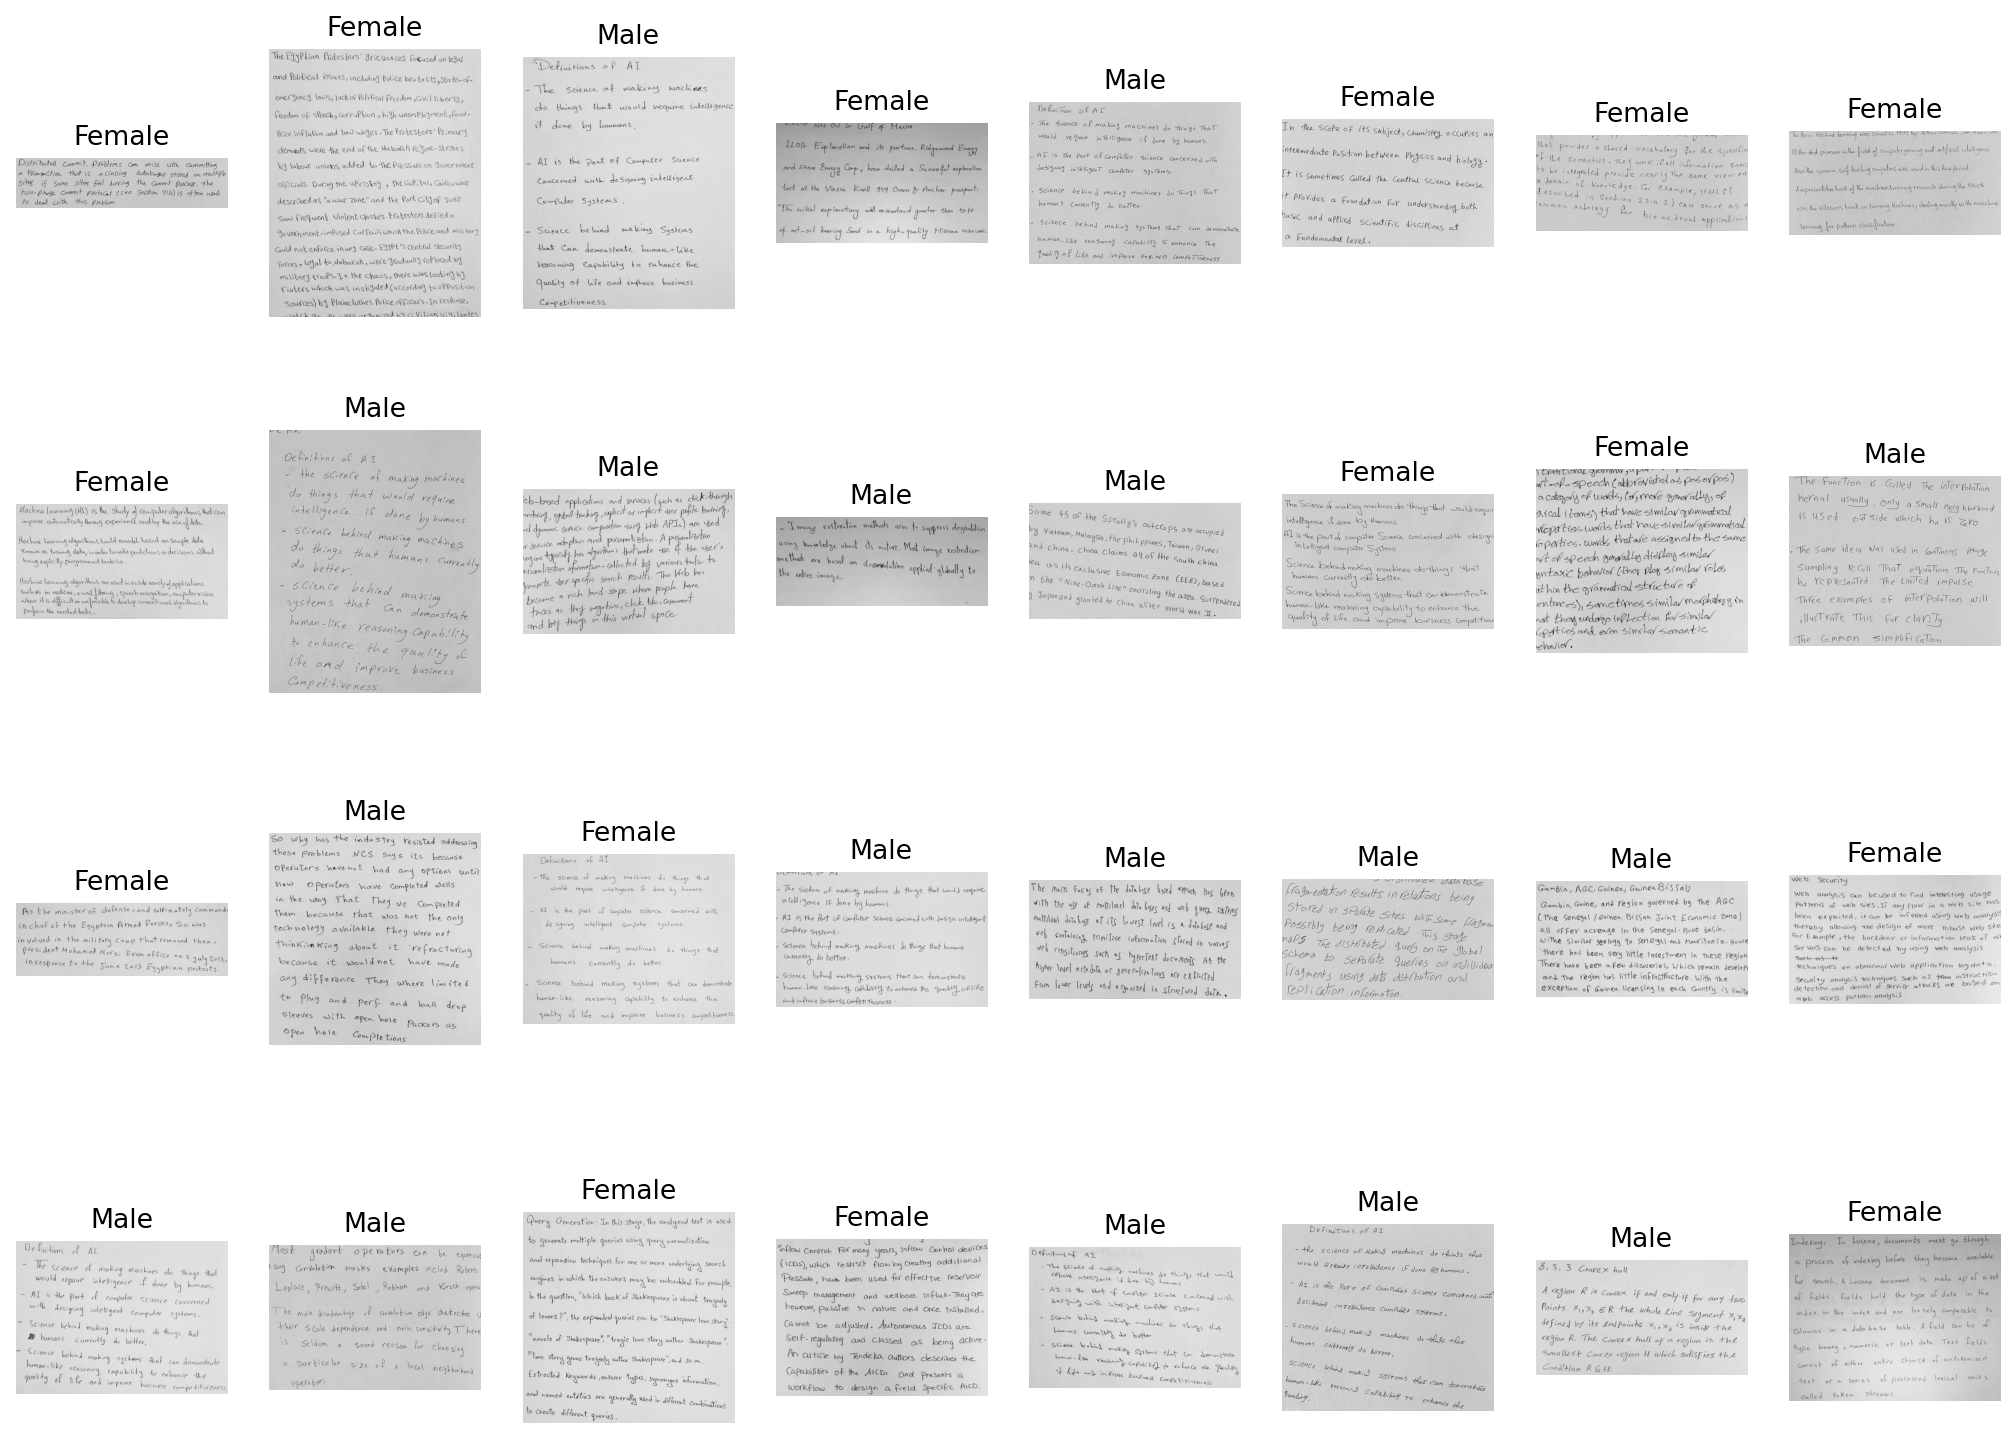

 length of training set is 271
 length of validation set is 91


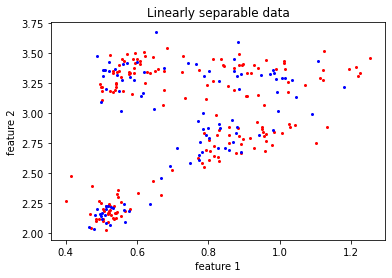

In [2]:
%run ../Features/FindGLCMFeatures.ipynb

In [ ]:
%run ../Features/FindHogFeatures.ipynb

## SVM Classifier - Training

In [32]:

# Initialize SVM classifier
model = svm.SVC(kernel='poly')                # Let's case into an infinte dimensional space.
model = model.fit(x_train, y_train)


In [ ]:
# Initialize SVM classifier for HOG
modelofHOG = svm.LinearSVC()                # Let's case into an infinte dimensional space.
modelofHOG = modelofHOG.fit(x_train,y_train)


## SVM Classifier - Testing

In [ ]:
#HOG non linear SVM
predictions = modelofHOG.predict(x_test)
print(metrics.accuracy_score(y_test, predictions) * 100)

In [33]:
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test, predictions) * 100)

56.043956043956044


In [34]:
x_m_test = x_test[y_test == 1]
x_f_test = x_test[y_test == 0]
y_m_test = y_test[y_test == 1]
y_f_test = y_test[y_test == 0]

predictions = model.predict(x_m_test)
print(metrics.accuracy_score(y_m_test, predictions) * 100)
print()
predictions = model.predict(x_f_test)
print(metrics.accuracy_score(y_f_test, predictions) * 100)


100.0

0.0
